#This code demonstrates two types of visualizations for council URL data:

Bar chart for a single council – highlights policy areas with the largest proportion of URLs.

Heatmap for all councils – provides a comparative overview of URL proportions across councils and policy areas.

/tmp/ipython-input-1667934732.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='proportion', y='policy_area', data=council_data, palette="viridis")


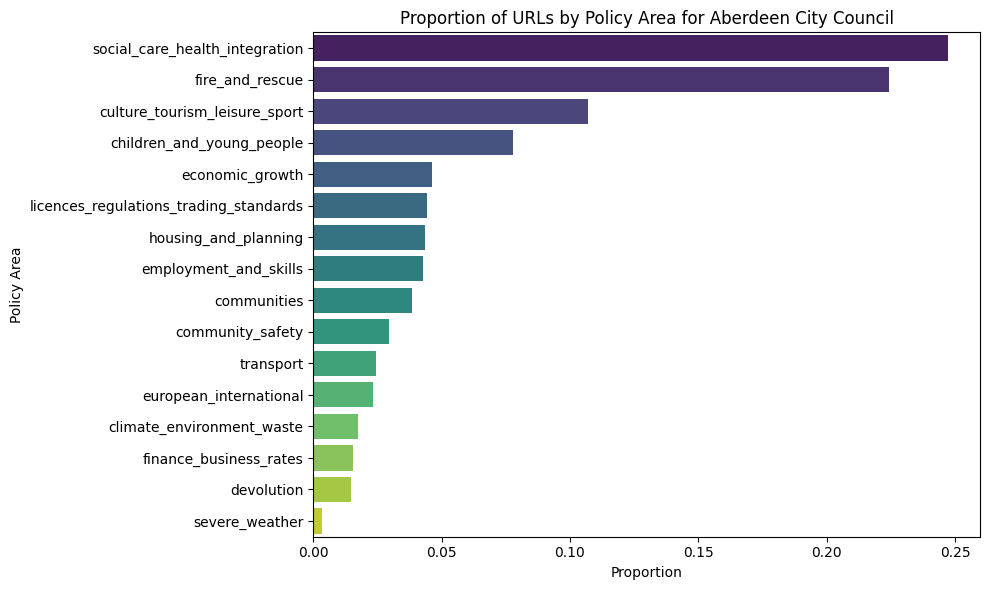

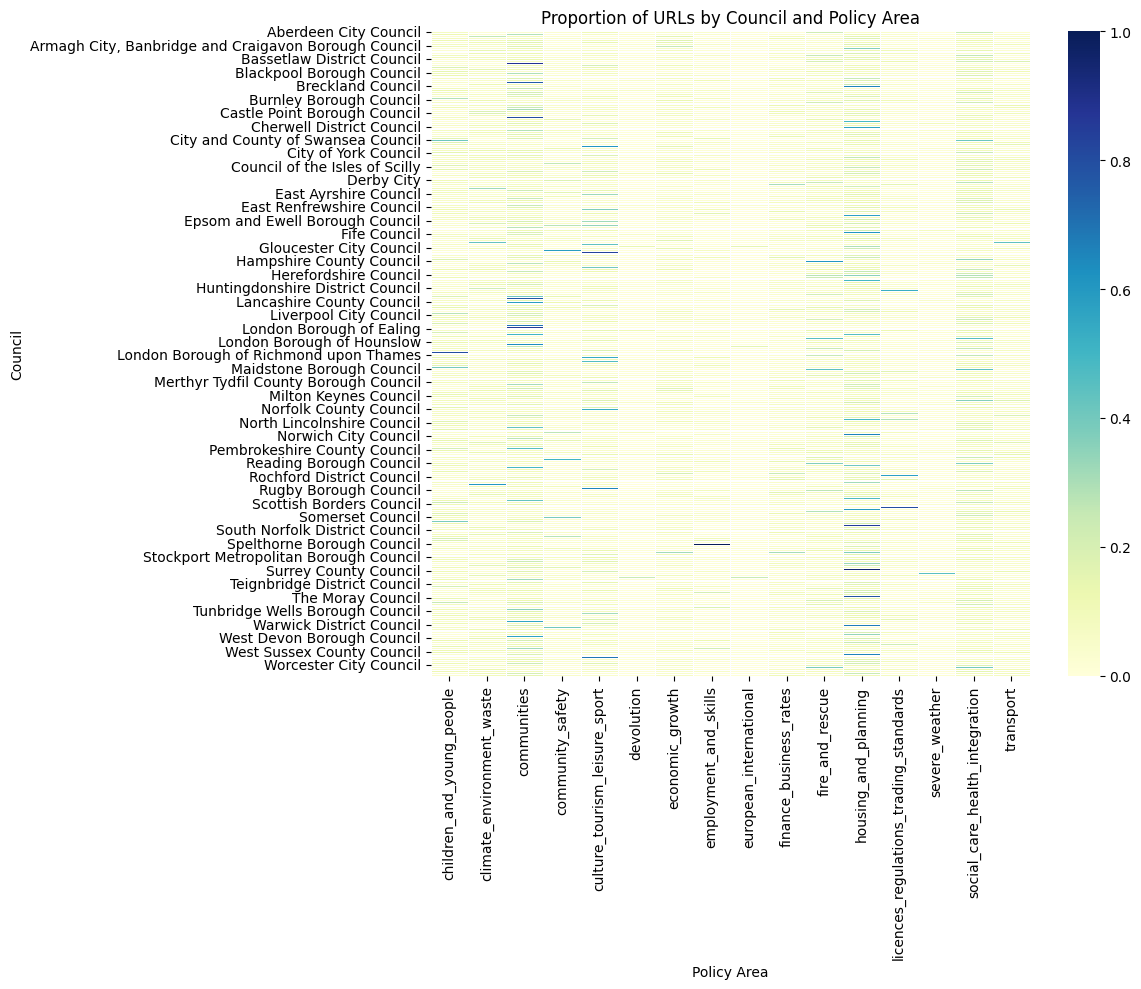

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV

df = pd.read_csv("council-policy-urlcount-normalised.csv")

# Example 1: Bar chart for a specific council

council_name = "Aberdeen City Council"
council_data = df[df['name'] == council_name].sort_values(by='proportion', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='proportion', y='policy_area', data=council_data, palette="viridis")
plt.title(f"Proportion of URLs by Policy Area for {council_name}")
plt.xlabel("Proportion")
plt.ylabel("Policy Area")
plt.tight_layout()
plt.show()

# Example 2: Heatmap of proportions across councils and policy areas

# Pivot the data

heatmap_data = df.pivot_table(index='name', columns='policy_area', values='proportion', fill_value=0)

plt.figure(figsize=(12,10))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5)
plt.title("Proportion of URLs by Council and Policy Area")
plt.xlabel("Policy Area")
plt.ylabel("Council")
plt.tight_layout()
plt.show()


#The code identifies the 10 councils with the most URLs, filters the dataset to only include these councils, reshapes the data into a format suitable for visualization, and plots a horizontal stacked bar chart showing the proportion of URLs in each policy area for these top councils.

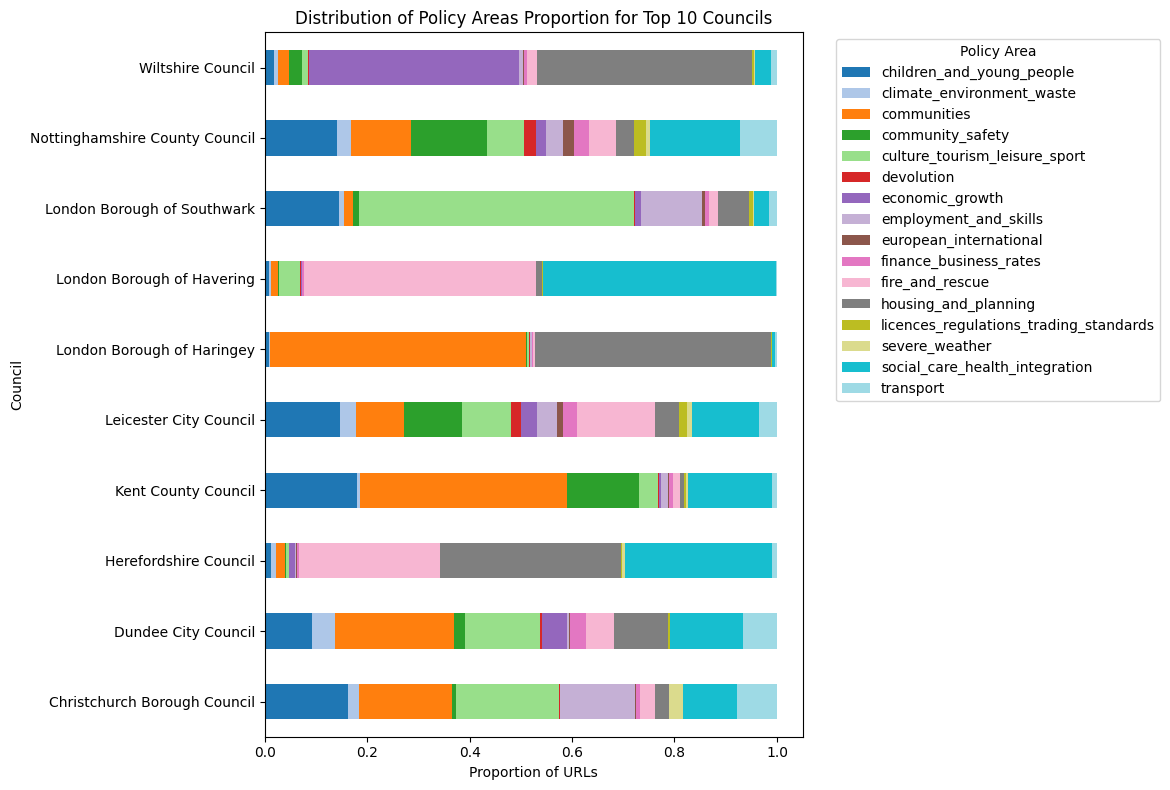

In [ ]:
#Sum total URLs per council to find top councils

top_councils = df.groupby('name')['total_urls'].sum().sort_values(ascending=False).head(10).index

#Filter data

top_df = df[df['name'].isin(top_councils)]

#Pivot for stacked bar chart

stacked_data = top_df.pivot_table(index='name', columns='policy_area', values='proportion', fill_value=0)

#Plot horizontal stacked bar chart

stacked_data.plot(kind='barh', stacked=True, figsize=(12,8), colormap='tab20')
plt.title("Distribution of Policy Areas Proportion for Top 10 Councils")
plt.xlabel("Proportion of URLs")
plt.ylabel("Council")
plt.legend(title="Policy Area", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Converting to Wide format

In [ ]:
import pandas as pd

# Load CSV
df = pd.read_csv("council-policy-urlcount-normalised.csv")

# Drop the leading index column if it's unnamed or just numbers
if df.columns[0].lower() in ["name", "unnamed: 0"]:
    df = df.drop(df.columns[0], axis=1)

# Rename columns for convenience
df.columns = ["council", "policy_area", "count", "total", "normalized"]

# Pivot to wide format using 'normalized' values
df_wide = df.pivot_table(index="council",
                         columns="policy_area",
                         values="normalized",
                         fill_value=0).reset_index()

# Flatten columns
df_wide.columns.name = None

# Save wide-format CSV
df_wide.to_csv("council-policy-wide.csv", index=False)
df_wide.head()


,council,children_and_young_people,climate_environment_waste,communities,community_safety,culture_tourism_leisure_sport,devolution,economic_growth,employment_and_skills,european_international,finance_business_rates,fire_and_rescue,housing_and_planning,licences_regulations_trading_standards,severe_weather,social_care_health_integration,transport
0,Aberdeen City Council,0.077786,0.017519,0.038542,0.029432,0.107218,0.014716,0.046251,0.042747,0.023125,0.015417,0.224247,0.043448,0.044149,0.003504,0.247372,0.024527
1,Aberdeenshire Council,0.118304,0.037388,0.282366,0.014509,0.065290,0.035156,0.034040,0.039062,0.013393,0.027344,0.030692,0.107701,0.040179,0.006138,0.100446,0.047991
2,Amber Valley Borough Council,0.027523,0.256881,0.100917,0.027523,0.009174,0.018349,0.155963,0.000000,0.000000,0.082569,0.027523,0.155963,0.045872,0.000000,0.045872,0.045872
3,Angus Council,0.083582,0.062687,0.077612,0.044776,0.035821,0.011940,0.029851,0.041791,0.017910,0.113433,0.059701,0.179104,0.032836,0.047761,0.089552,0.071642
4,Antrim and Newtownabbey Borough Council,0.120444,0.096672,0.139461,0.020602,0.093502,0.022187,0.172742,0.017433,0.019017,0.022187,0.028526,0.064976,0.031696,0.019017,0.125198,0.006339


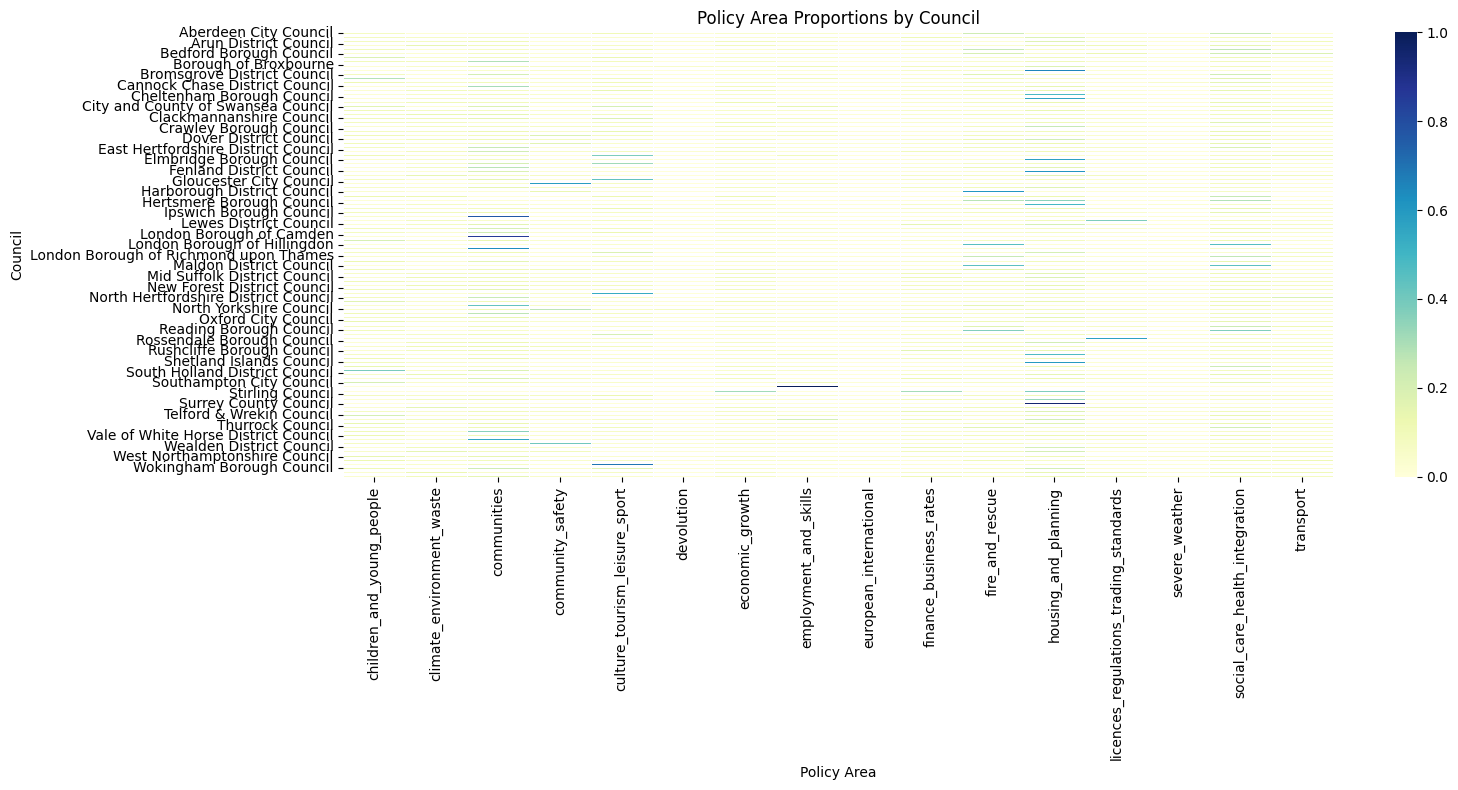

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your wide-format CSV
df = pd.read_csv("council-policy-wide.csv")

# Set the council as index
df.set_index("council", inplace=True)

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(df, cmap="YlGnBu", linewidths=0.5)
plt.title("Policy Area Proportions by Council")
plt.xlabel("Policy Area")
plt.ylabel("Council")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your wide-format CSV
df = pd.read_csv("council-policy-wide.csv")

# Keep council names separately
councils = df['council']

# Use only numerical columns for clustering
X = df.drop(columns='council')

# Optional: Standardize features (helps KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.cluster import KMeans

# Decide number of clusters, e.g., 4
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
df['cluster'] = clusters


In [ ]:
print(df[['council', 'cluster']])


                                     council  cluster
0                      Aberdeen City Council        0
1                      Aberdeenshire Council        1
2               Amber Valley Borough Council        0
3                              Angus Council        0
4    Antrim and Newtownabbey Borough Council        0
..                                       ...      ...
330            Worcestershire County Council        0
331                 Worthing Borough Council        0
332           Wrexham County Borough Council        0
333                Wychavon District Council        0
334                             Wyre Council        0

[335 rows x 2 columns]


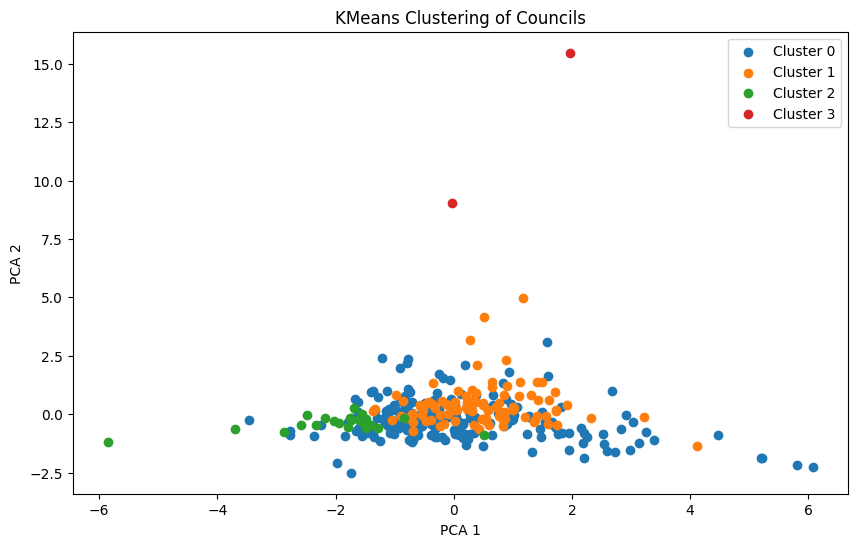

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
for cluster in range(k):
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1], label=f"Cluster {cluster}")

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("KMeans Clustering of Councils")
plt.legend()
plt.show()